David Treviño Camarillo 624996

Importa los datos del archivo “Felicidad y GDP.csv” a tu ambiente de trabajo. Por
curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor
GDP. Imprime en consola un resumen de 10 filas de la base de datos, previamente
ordenada de mayor a menor felicidad. Te recomiendo que hagas uso de la función
“sort_values()”, especificando como primer parámetro el nombre de la columna de interés,
y el parámetro “ascending” con valor “False”. Repite el proceso, pero ahora ordenando la
base de datos de mayor a menor GDP.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

data=pd.read_csv("A1.2 Felicidad y GDP.csv")

## Paises con Mayor Felicidad
data.sort_values("Felicidad", ascending=False, inplace=True)
display(data.head(10))

## Paises con mayor GDP
data.sort_values("GDP", ascending=False, inplace=True)
display(data.head(10))

Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11

Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12

Grafica las observaciones, definiendo el valor de “y” como el nivel de felicidad y el valor
de “x” como el logaritmo base 10 del GDP. Típicamente, cuando trabajamos con números
tan grandes como lo es el GDP, es mucho más común encontrar asociaciones con el
logaritmo base 10 de la variable, que con la variable misma. Esto no es un problema,
siempre y cuando nuestra conclusión incluya este recordatorio. Es decir, si descubrimos
que sí existe una asociación, diríamos que: “encontramos una asociación
estadísticamente significativa entre los niveles de felicidad y el logaritmo base 10 del
GDP”. La librería numpy tiene la función “log10()”, puedes usarla para transformar el GDP.

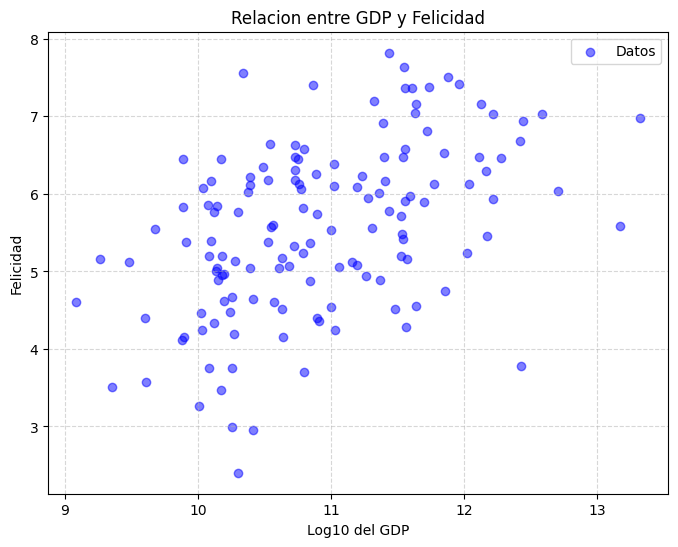

In [44]:
## Asignar los valores de x e y
y=data["Felicidad"]
x=np.log10(data["GDP"])

## Graficar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", alpha=0.5, label="Datos")
plt.title("Relacion entre GDP y Felicidad")
plt.xlabel("Log10 del GDP")
plt.ylabel("Felicidad")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

Calcula los valores óptimos de los dos coeficientes del modelo de regresión lineal simple.
Realiza este proceso “a mano”, sin apoyarte con funciones preestablecidas de librerías
de análisis de datos. Al finalizar, imprime en consola ambos valores. Siempre es bueno
especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una
sintaxis similar a: print(“B1 =”, B1).

In [45]:
## Obtener la media de x y de y
x_mean=np.mean(x)
y_mean=np.mean(y)

## Calcular B1 Pendiente
numerador=np.sum((x-x_mean)*(y-y_mean))
denominador=np.sum((x-x_mean)**2)
B1=numerador/denominador

## Calcular B0 Interseccion
B0=y_mean-B1*x_mean

print("B1= ", B1)
print("B0= ", B0)

B1=  0.628128465881041
B0=  -1.3023500570747295


Realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea
que representa el modelo de regresión lineal simple. Te recomiendo usar un valor de
transparencia de 0.75, tanto para las observaciones como para la línea.

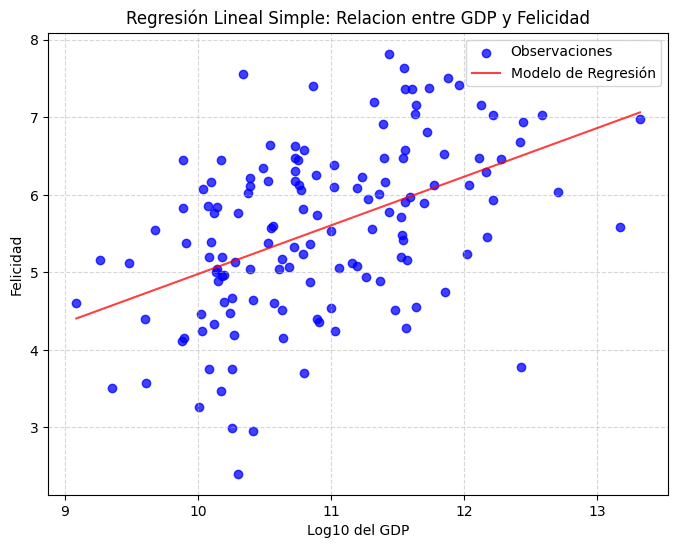

In [46]:
regresion=B0+B1*x

## Graficar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.75, label="Observaciones")  # Observaciones
plt.plot(x, regresion, color='red', alpha=0.75, label="Modelo de Regresión")  # Línea de regresión
plt.title("Regresión Lineal Simple: Relacion entre GDP y Felicidad")
plt.xlabel("Log10 del GDP")
plt.ylabel("Felicidad")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

Calcula el RSS del modelo e imprímelo en la consola.

In [47]:
RSS=np.sum((y-regresion)**2)

print("RSS= ", RSS)

RSS=  131.37383177326353


Calcula el error estándar e intervalo de confianza de 𝛽̂
1, e imprime dichos valores en la
consola. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo
que te recomiendo usar una sintaxis similar a: print(“SE =”, SE). Asimismo, determina si
la asociación entre la felicidad y el GDP es significativa en esta población, imprimiendo
en consola un mensaje que claramente explique el por qué de la afirmación, evidenciado
por alguna métrica calculada.

In [48]:
## Para todo este proceso me apoye con chatGPT para las formulas y uso de la libreria scipy.stats

## Calculo del Error Estándar
SE=np.sqrt(RSS/((len(x)-2)*np.sum((x-x_mean)**2)))

print("Error Estándar= ", SE)

## Nivel de confianza 95% alpha = 0.05
## Valor critico para un intervalo del 95%
crit=stats.t.ppf(0.975, df=len(x)-2)
## Intervalos de Confianza Menor y Mayor
intMen=B1-crit*SE
intMay=B1+crit*SE

print("Intervalo de confianza de B1= ({:.4f}, {:.4f})".format(intMen, intMay))

## Calcular Estadistico t
t=B1/SE
## Calcular valor p
p=2*(1-stats.t.cdf(abs(t), df=len(x)-2))

print("Valor Estadistico t= ", t)
print("Valor p= ", p)

# Interpretación de significancia
if p < 0.05:
    print("La asociación entre felicidad y GDP es significativa (p < 0.05).")
else:
    print("La asociación entre felicidad y GDP no es significativa (p >= 0.05).")

Error Estándar=  0.09983378435340728
Intervalo de confianza de B1= (0.4307, 0.8255)
Valor Estadistico t=  6.291742519320848
Valor p=  3.825717964645037e-09
La asociación entre felicidad y GDP es significativa (p < 0.05).


Calcula el residual standard error y la 𝑅
2 del modelo, e imprime dichos valores en la
consola. Para el cálculo de 𝑅
2
, te recomiendo primero calcular el total sum of squares, o
TSS. Para el cálculo del mismo, pon mucha atención al orden de los paréntesis, pues no
es lo mismo sumar el cuadrado de múltiples valores, que sumar múltiples valores y elevar
el resultado al cuadrado. Adicionalmente, agrega un comentario, imprimiéndolo en
consola, sobre tu opinión del valor de 𝑅
2 obtenido con el modelo.


In [49]:
## Calcular el RSE
RSE=np.sqrt(RSS/(len(x)-2))
print("Residual Standard Error= ", RSE)

## Calcular TSS
TSS=np.sum((y-y_mean)**2)

## Calcular R2
R2=1-(RSS/TSS)
print("R^2= ", R2)

## R2 nos ayuda a conocer si el modelo logra explicar bien la relacion entre GDP y Felicidad
if R2 > 0.8:
    print("El modelo explica una gran parte de la variabilidad de la felicidad.")
elif R2 > 0.5:
    print("El modelo explica una parte significativa de la variabilidad de la felicidad.")
else:
    print("El modelo no explica bien la variabilidad de la felicidad.")

Residual Standard Error=  0.9721807858537376
R^2=  0.22166361654970634
El modelo no explica bien la variabilidad de la felicidad.


Finalmente, usa la función “OLS()” de la librería statsmodels.api para verificar que los
resultados de todos los puntos anteriores son los esperados. Si el resumen de los
resultados te entrega un p-value = 0.000, puedes observar el resultado con muchas más
cifras significativas usando la función “pvalues” de la misma librería. Por ejemplo: si los
resultados de ajustar el modelo los almacenaste en una variable de nombre “var”, puedes
usar la siguiente sintaxis: var.pvalues. Por default, el RSE no se muestra en el resumen,
para revisarlo utiliza la línea de código print(var.scale**.5), de nuevo asumiendo que
almacenaste el resultado en una variable de nombre “var”.

In [50]:
## Me apoyo con chat GPT para el uso de la libreria statsmodels

# Añadir una constante (intercepto) a los datos
X = sm.add_constant(x)

# Ajustar el modelo OLS
model = sm.OLS(y, X)
var = model.fit()

# Ver resumen completo
print(var.summary())

# Ver p-values
print("P-values:", var.pvalues)

# Ver el Residual Standard Error (RSE)
print("Residual Standard Error (RSE):", var.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        19:03:23   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

Segun los resultados de la funcion OLS:

El PIB tiene un efecto significativo sobre la Felicidad, pero el modelo no explica bien la variabilidad de la felicidad debido a que el 𝑅^2 es bajo. Esto sugiere que el PIB es solo uno de los muchos factores que influyen en la felicidad y que hay otros factores que podrían mejorar la predicción del modelo. El modelo es útil, pero es necesario incluir más variables para obtener un mejor ajuste y mayor precisión.

En mi opinion algunas otras variables que podrian ser importantes en relacion con la felicidad serian por ejemplo, indices de delincuencia, esperanza de vida, tasas de empleo, servicios de salud, entre otros.